### Preparing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("new_adult.csv") 
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,34,Federal-gov,67083,Bachelors,13,Never-married,Exec-managerial,Unmarried,Asian-Pac-Islander,Male,1471,0,40,Cambodia,<=50K
1,27,Private,292472,Some-college,10,Never-married,Craft-repair,Not-in-family,Asian-Pac-Islander,Male,0,1876,45,Cambodia,<=50K
2,40,Private,121956,Bachelors,13,Married-spouse-absent,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,13550,0,40,Cambodia,>50K
3,32,Private,112137,Preschool,1,Married-civ-spouse,Machine-op-inspct,Wife,Asian-Pac-Islander,Female,4508,0,40,Cambodia,<=50K
4,37,Private,191342,1st-4th,2,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Cambodia,<=50K


In [3]:
new_data = pd.get_dummies(data)
new_data['capital.gain'] = data['capital.gain'] - data['capital.loss']
new_data = new_data.drop(['fnlwgt','capital.loss'],axis=1)
new_data.head()

,age,education.num,capital.gain,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
0,34,13,1471,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,27,10,-1876,45,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,40,13,13550,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,32,1,4508,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,37,2,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
from sklearn.model_selection import train_test_split

X = new_data.drop(['income_<=50K','income_>50K'],axis=1)
y = new_data['income_>50K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

### Function to evaluate model performance

In [5]:
from sklearn.metrics import normalized_mutual_info_score, precision_score, recall_score, accuracy_score

def scores(true,pred):
    a = accuracy_score(true, pred)
    p = precision_score(true, pred)
    r = recall_score(true, pred)   
    f = 2*p*r/(p+r)
    nmi = normalized_mutual_info_score(true, pred)
    return [a,p,r,f,nmi]

### Finding best number of neighbors to use (K) for classifier

In [6]:
from sklearn import neighbors
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

a = []
p = []
r = []
f = []
nmi = []
x = np.arange(1,100,1)
for k in x:
    #print('processing: ',k)
    knnn = neighbors.KNeighborsClassifier(n_neighbors = k)
    knnn.fit(X_train, y_train)
    predn = knnn.predict(X_test)
    s = scores(y_test,predn)
    a += [s[0]]
    p += [s[1]]
    r += [s[2]]
    f += [s[3]]
    nmi += [s[4]]

In [12]:
best_a = a.index(max(a))
best_p = p.index(max(p))
best_r = r.index(max(r))
best_f = f.index(max(f))
best_nmi = nmi.index(max(nmi))

choices,counts = np.unique([best_a,best_p,best_r,best_f,best_nmi],return_counts=True)
if len(choices) == 5:
    best_k = best_a
else:
    index = list(counts).index(max(counts))
    best_k = choices[index] + 1

print(a.index(max(a)),p.index(max(p)),r.index(max(r)),f.index(max(f)),nmi.index(max(nmi)))

22 1 2 22 22


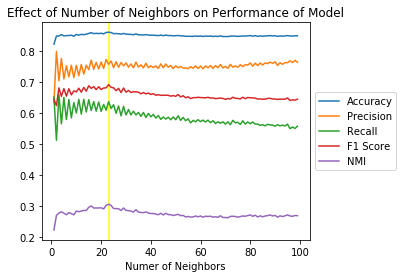

In [13]:
ax = plt.subplot(111)
plt.axvline(x=best_k,color='yellow')
plt.plot(x,a,label = 'Accuracy')
plt.plot(x,p,label = 'Precision')
plt.plot(x,r,label = 'Recall')
plt.plot(x,f,label = 'F1 Score')
plt.plot(x,nmi,label = 'NMI')
plt.title('Effect of Number of Neighbors on Performance of Model')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Numer of Neighbors')
#plt.savefig('kdependence.png')
plt.show()

### Creating KNN Clasifier

In [14]:
knn = neighbors.KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=2,
           weights='uniform')

In [15]:
pred = knn.predict(X_test)

### Analyzing results

In [17]:
names = ['Accuracy', 'Precision', 'Recall','F1 Score', 'NMI']
my_s = scores(y_test,pred)

results = pd.DataFrame(data = my_s,index = names, columns = ['KNN, all variables'])
results

,"KNN, all variables"
Accuracy,0.859463
Precision,0.755981
Recall,0.636242
F1 Score,0.690962
NMI,0.305713


In [20]:
false_pos_neg = list(range(len(pred)))
for i in range(len(pred)):
    false_pos_neg[i] = list(y_test)[i] - pred[i]

### Using dimension reduction tools (PCA, t-SNE, isomap) to show KNN results in 2D

#### PCA

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2).fit(X_test)
data2D_pca = pca.transform(X_test)

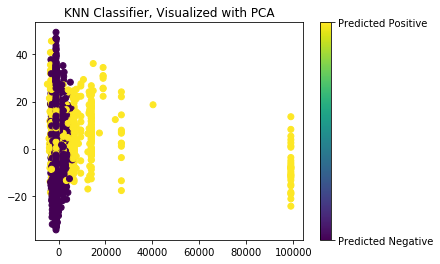

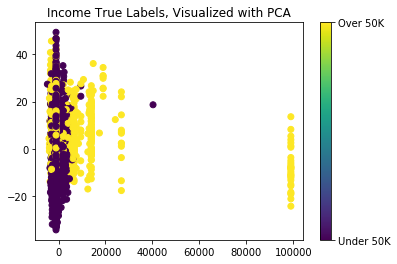

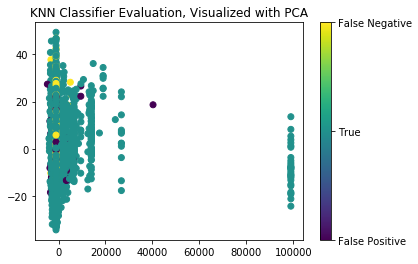

In [60]:
plt.scatter(data2D_pca[:,0],data2D_pca[:,1],c=pred)
plt.title('KNN Classifier, Visualized with PCA')
labels = ['Predicted Negative','Predicted Positive']
cb = plt.colorbar()
loc = np.arange(0,2,2/float(2))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('PCA_results.png')
plt.show()

plt.scatter(data2D_pca[:,0],data2D_pca[:,1],c=y_test)
plt.title('Income True Labels, Visualized with PCA')
labels = ['Under 50K','Over 50K']
cb = plt.colorbar()
loc = np.arange(0,2,2/float(2))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('PCA_truelabels.png')
plt.show()

plt.scatter(data2D_pca[:,0],data2D_pca[:,1],c=false_pos_neg)
plt.title('KNN Classifier Evaluation, Visualized with PCA')
labels = ['False Positive','True', 'False Negative']
cb = plt.colorbar()
loc = np.arange(-1,2,3/float(3))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('pca_evaluation.png')
plt.show()

#### t-SNE

In [24]:
from sklearn.manifold import TSNE

data2D_tsne = TSNE(n_components=2).fit_transform(X_test)

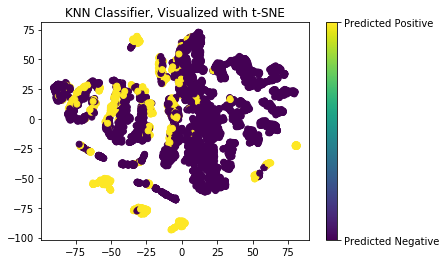

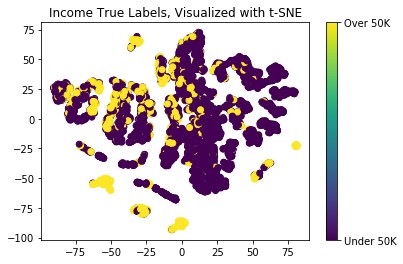

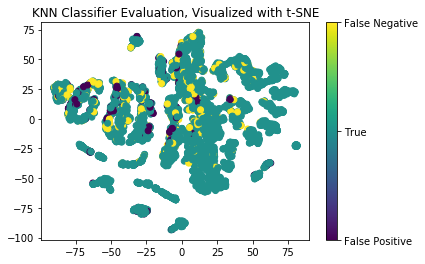

In [58]:
plt.scatter(data2D_tsne[:,0],data2D_tsne[:,1],c=pred)
plt.title('KNN Classifier, Visualized with t-SNE')
labels = ['Predicted Negative','Predicted Positive']
cb = plt.colorbar()
loc = np.arange(0,2,2/float(2))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('tSNE_results.png')
plt.show()

plt.scatter(data2D_tsne[:,0],data2D_tsne[:,1],c=y_test)
plt.title('Income True Labels, Visualized with t-SNE')
labels = ['Under 50K','Over 50K']
cb = plt.colorbar()
loc = np.arange(0,2,2/float(2))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('tSNE_truelabels.png')
plt.show()

plt.scatter(data2D_tsne[:,0],data2D_tsne[:,1],c=false_pos_neg)
plt.title('KNN Classifier Evaluation, Visualized with t-SNE')
labels = ['False Positive','True', 'False Negative']
cb = plt.colorbar()
loc = np.arange(-1,2,3/float(3))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('tSNE_evaluation.png')
plt.show()

#### isomap

In [62]:
from sklearn.manifold import Isomap

embedding = Isomap(n_components=2)
data2D_isomap = embedding.fit_transform(X_test)

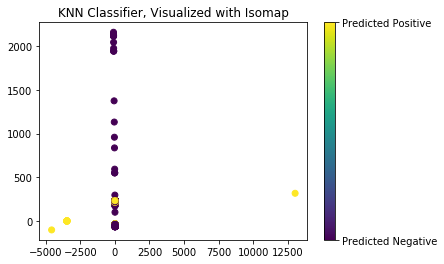

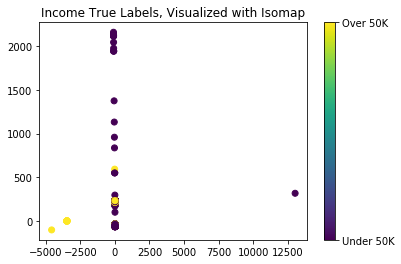

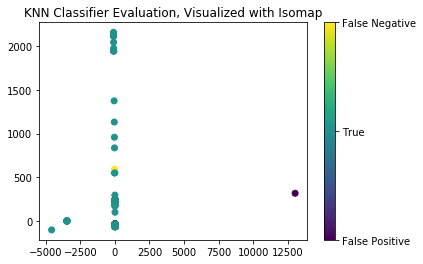

In [64]:
plt.scatter(data2D_isomap[:,0],data2D_isomap[:,1],c=pred)
plt.title('KNN Classifier, Visualized with Isomap')
labels = ['Predicted Negative','Predicted Positive']
cb = plt.colorbar()
loc = np.arange(0,2,2/float(2))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('isomap_results.png')
plt.show()

plt.scatter(data2D_isomap[:,0],data2D_isomap[:,1],c=y_test)
plt.title('Income True Labels, Visualized with Isomap')
labels = ['Under 50K','Over 50K']
cb = plt.colorbar()
loc = np.arange(0,2,2/float(2))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('isomap_truelabels.png')
plt.show()

plt.scatter(data2D_isomap[:,0],data2D_isomap[:,1],c=false_pos_neg)
plt.title('KNN Classifier Evaluation, Visualized with Isomap')
labels = ['False Positive','True', 'False Negative']
cb = plt.colorbar()
loc = np.arange(-1,2,3/float(3))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('tisomap_evaluation.png')
plt.show()

### KNN using 2 variables so can plot in 2D to show decision boundary

In [29]:
twovarX = pd.DataFrame(data[['age','education.num']])
twovary = new_data['income_>50K']
twovarX.head()

,age,education.num
0,34,13
1,27,10
2,40,13
3,32,1
4,37,2


In [30]:
twovarX_train, twovarX_test, twovary_train, twovary_test = train_test_split(twovarX, twovary, test_size=0.2, random_state=73)

twovar_knn = neighbors.KNeighborsClassifier(n_neighbors=22)
twovar_knn.fit(twovarX_train, twovary_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=22, p=2,
           weights='uniform')

In [31]:
twovar_pred = twovar_knn.predict(twovarX_test)

In [34]:
s_twovar = scores(twovary_test,twovar_pred)
results['KNN, 2 variables'] = s_twovar
results

,"KNN, all variables","KNN, 2 variables"
Accuracy,0.859463,0.785880
Precision,0.755981,0.625635
Recall,0.636242,0.330872
F1 Score,0.690962,0.432836
NMI,0.305713,0.107006


In [35]:
twovar_false_pos_neg = list(range(len(twovar_pred)))
for i in range(len(twovar_pred)):
    twovar_false_pos_neg[i] = list(twovary_test)[i] - twovar_pred[i]

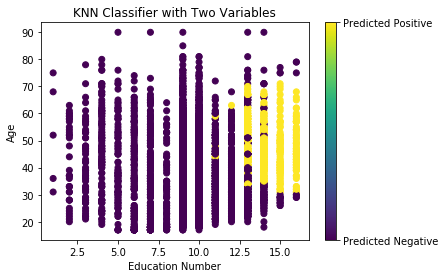

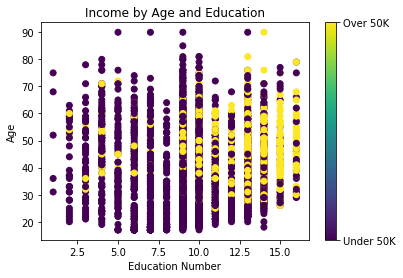

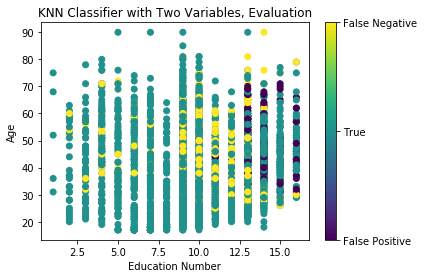

In [36]:
plt.scatter(twovarX_test['education.num'],twovarX_test['age'],c=twovar_pred)
plt.title('KNN Classifier with Two Variables')
plt.xlabel('Education Number')
plt.ylabel('Age')
labels = ['Predicted Negative','Predicted Positive']
cb = plt.colorbar()
loc = np.arange(0,2,2/float(2))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('2var_Results.png')
plt.show()

plt.scatter(twovarX_test['education.num'],twovarX_test['age'],c=twovary_test)
plt.title('Income by Age and Education')
plt.xlabel('Education Number')
plt.ylabel('Age')
labels = ['Under 50K','Over 50K']
cb = plt.colorbar()
loc = np.arange(0,2,2/float(2))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('2var_truelabels.png')
plt.show()


plt.scatter(twovarX_test['education.num'],twovarX_test['age'],c=twovar_false_pos_neg)
plt.title('KNN Classifier with Two Variables, Evaluation')
plt.xlabel('Education Number')
plt.ylabel('Age')
labels = ['False Positive','True', 'False Negative']
cb = plt.colorbar()
loc = np.arange(-1,2,3/float(3))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('2var_evaluation.png')
plt.show()

### Naive Bayes Classifiers

In [37]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [38]:
nbcg = GaussianNB()
nbcg.fit(X_train,y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
predg = nbcg.predict(X_test)

In [40]:
sg = scores(y_test,predg)
results['NBC Gauss'] = sg
results

,"KNN, all variables","KNN, 2 variables",NBC Gauss
Accuracy,0.859463,0.785880,0.804441
Precision,0.755981,0.625635,0.571693
Recall,0.636242,0.330872,0.829530
F1 Score,0.690962,0.432836,0.676889
NMI,0.305713,0.107006,0.263170


In [41]:
nbcb = BernoulliNB()
nbcb.fit(X_train,y_train) 

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [42]:
predb = nbcb.predict(X_test)

In [43]:
sb = scores(y_test,predb)
results['NBC Bernoulli'] = sb
results

,"KNN, all variables","KNN, 2 variables",NBC Gauss,NBC Bernoulli
Accuracy,0.859463,0.785880,0.804441,0.768644
Precision,0.755981,0.625635,0.571693,0.520650
Recall,0.636242,0.330872,0.829530,0.795302
F1 Score,0.690962,0.432836,0.676889,0.629315
NMI,0.305713,0.107006,0.263170,0.201172


For multinomial distribution, must separate capital.loss and capital.gain again, because negative numbers are not accepted

In [45]:
multi_data = pd.get_dummies(data)
multi_data = multi_data.drop('fnlwgt',axis=1)
multi_data = multi_data.drop('income_<=50K',axis=1)
multi_data.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
0,34,13,1471,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27,10,0,1876,45,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,40,13,13550,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,32,1,4508,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,37,2,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
Xm = multi_data.drop('income_>50K',axis=1)
ym = multi_data['income_>50K']

Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.2, random_state=73)

nbcm = MultinomialNB()
nbcm.fit(Xm_train,ym_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
predm = nbcm.predict(Xm_test)

In [49]:
sm = scores(ym_test,predm)
results['NBC Multinomial'] = sm
results

,"KNN, all variables","KNN, 2 variables",NBC Gauss,NBC Bernoulli,NBC Multinomial
Accuracy,0.859463,0.785880,0.804441,0.768644,0.775936
Precision,0.755981,0.625635,0.571693,0.520650,0.626838
Recall,0.636242,0.330872,0.829530,0.795302,0.228859
F1 Score,0.690962,0.432836,0.676889,0.629315,0.335300
NMI,0.305713,0.107006,0.263170,0.201172,0.079279


In [56]:
false_pos_neg_g = list(range(len(pred)))
for i in range(len(pred)):
    false_pos_neg_g[i] = list(y_test)[i] - predb[i]

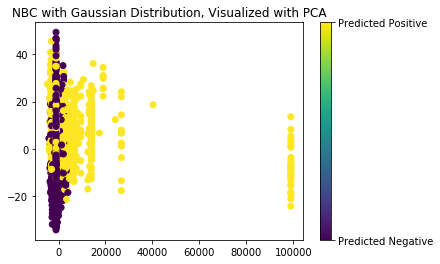

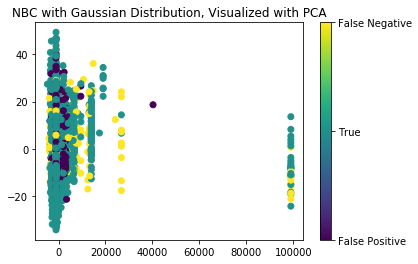

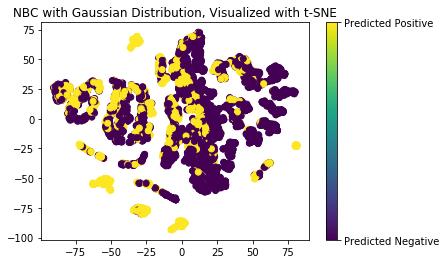

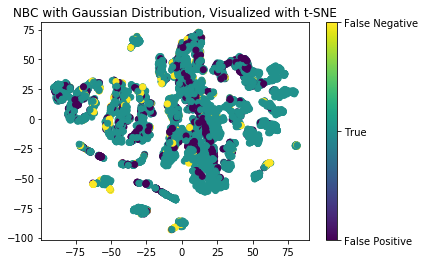

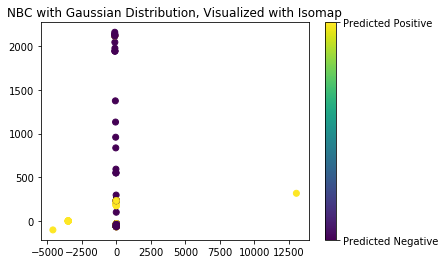

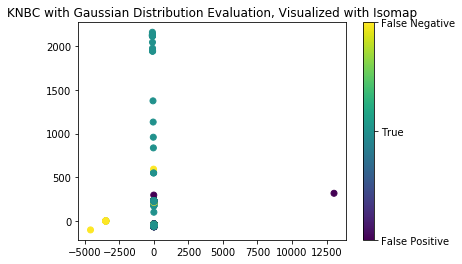

In [65]:
plt.scatter(data2D_pca[:,0],data2D_pca[:,1],c=predg)
plt.title('NBC with Gaussian Distribution, Visualized with PCA')
labels = ['Predicted Negative','Predicted Positive']
cb = plt.colorbar()
loc = np.arange(0,2,2/float(2))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('PCA_results_NBCg.png')
plt.show()

plt.scatter(data2D_pca[:,0],data2D_pca[:,1],c=false_pos_neg_g)
plt.title('NBC with Gaussian Distribution, Visualized with PCA')
labels = ['False Positive','True', 'False Negative']
cb = plt.colorbar()
loc = np.arange(-1,2,3/float(3))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('pca_evaluation_NBCg.png')
plt.show()


plt.scatter(data2D_tsne[:,0],data2D_tsne[:,1],c=predg)
plt.title('NBC with Gaussian Distribution, Visualized with t-SNE')
labels = ['Predicted Negative','Predicted Positive']
cb = plt.colorbar()
loc = np.arange(0,2,2/float(2))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('tSNE_results_NBCg.png')
plt.show()

plt.scatter(data2D_tsne[:,0],data2D_tsne[:,1],c=false_pos_neg_g)
plt.title('NBC with Gaussian Distribution, Visualized with t-SNE')
labels = ['False Positive','True', 'False Negative']
cb = plt.colorbar()
loc = np.arange(-1,2,3/float(3))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('tSNE_evaluation_NBCg.png')
plt.show()


plt.scatter(data2D_isomap[:,0],data2D_isomap[:,1],c=predg)
plt.title('NBC with Gaussian Distribution, Visualized with Isomap')
labels = ['Predicted Negative','Predicted Positive']
cb = plt.colorbar()
loc = np.arange(0,2,2/float(2))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('isomap_results_NBCg.png')
plt.show()

plt.scatter(data2D_isomap[:,0],data2D_isomap[:,1],c=false_pos_neg_g)
plt.title('KNBC with Gaussian Distribution Evaluation, Visualized with Isomap')
labels = ['False Positive','True', 'False Negative']
cb = plt.colorbar()
loc = np.arange(-1,2,3/float(3))
cb.set_ticks(loc)
cb.set_ticklabels(labels)
#plt.savefig('tisomap_evaluation_NBCg.png')
plt.show()